In [1]:
import sys
sys.path.append('../')
import pandas as pd
import numpy as np
from rdkit import Chem
from dft_descriptors import prepocessing as pp
from dft_descriptors import numbering_CO as nb

In [2]:
df = pd.read_csv('../data_csv/Data_test10282021.csv', sep = ',')
dft_ax = pd.read_csv('../data_csv/AX_dft.csv')
dft_lig = pd.read_csv('../data_csv/ligand_dft.csv')
dft_oc = pd.read_csv('../data_csv/substrate_dft.csv')

In [3]:
dft_ax["rdkit_can"]  = [Chem.CanonSmiles(smi) for smi in dft_ax["Unnamed: 0"]]
dft_lig["rdkit_can"] = [Chem.CanonSmiles(smi) for smi in dft_lig["Unnamed: 0"]]
dft_oc["rdkit_can"]  = [Chem.CanonSmiles(smi) for smi in dft_oc["Unnamed: 0"]]

In [4]:
canon_oc = np.unique([Chem.CanonSmiles(smi) for smi in np.unique(df["Reactant Smile (C-O)"])])
canon_ax = np.unique([Chem.CanonSmiles(smi) for smi in np.unique(df["A-X effectif"])])
sub_df = df.dropna(subset=["Ligand effectif"])
smi_ligs = np.unique([pp.dict_ligand[lig] for lig in sub_df["Ligand effectif"]])
canon_lig = np.unique([Chem.CanonSmiles(smi) for smi in smi_ligs])

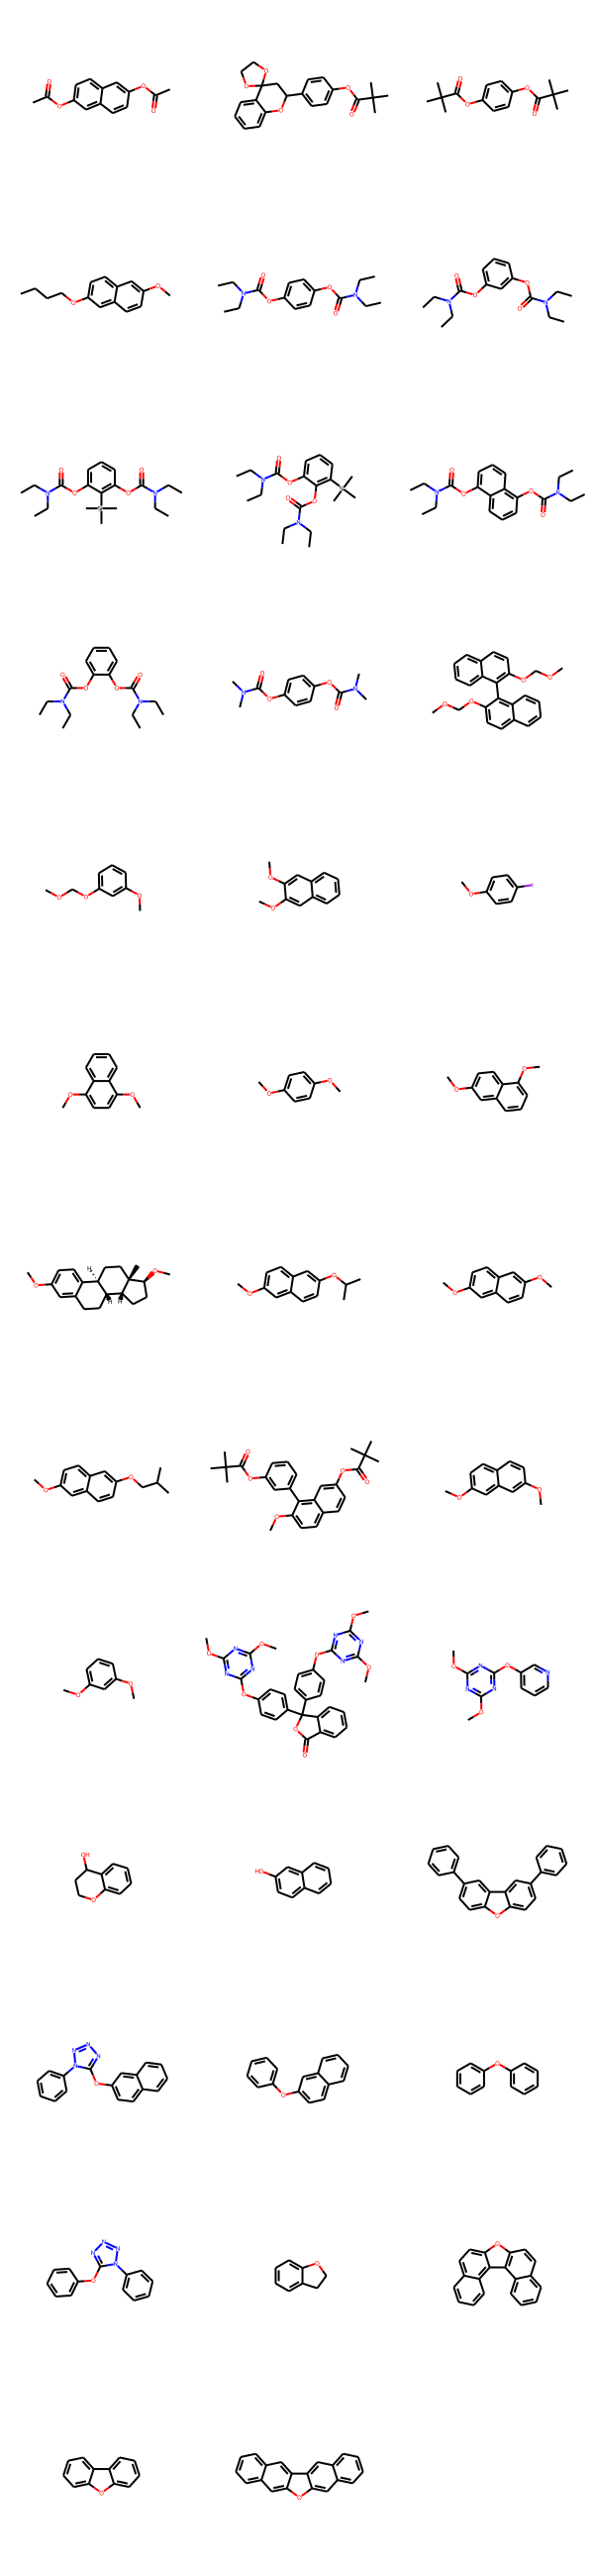

In [15]:
missing_oc = []
mols_oc = []
for smi in canon_oc:
    if smi not in list(dft_oc["rdkit_can"]):
        missing_oc.append(smi)
        mols_oc.append(Chem.MolFromSmiles(smi))
        
Chem.Draw.MolsToGridImage(mols_oc)

In [6]:
print(missing_oc)

['CC(=O)Oc1ccc2cc(OC(C)=O)ccc2c1', 'CC(C)(C)C(=O)Oc1ccc(C2CC3(OCCO3)c3ccccc3O2)cc1', 'CC(C)(C)C(=O)Oc1ccc(OC(=O)C(C)(C)C)cc1', 'CCCCOc1ccc2cc(OC)ccc2c1', 'CCN(CC)C(=O)Oc1ccc(OC(=O)N(CC)CC)cc1', 'CCN(CC)C(=O)Oc1cccc(OC(=O)N(CC)CC)c1', 'CCN(CC)C(=O)Oc1cccc(OC(=O)N(CC)CC)c1[Si](C)(C)C', 'CCN(CC)C(=O)Oc1cccc([Si](C)(C)C)c1OC(=O)N(CC)CC', 'CCN(CC)C(=O)Oc1cccc2c(OC(=O)N(CC)CC)cccc12', 'CCN(CC)C(=O)Oc1ccccc1OC(=O)N(CC)CC', 'CN(C)C(=O)Oc1ccc(OC(=O)N(C)C)cc1', 'COCOc1ccc2ccccc2c1-c1c(OCOC)ccc2ccccc12', 'COCOc1cccc(OC)c1', 'COc1cc2ccccc2cc1OC', 'COc1ccc(I)cc1', 'COc1ccc(OC)c2ccccc12', 'COc1ccc(OC)cc1', 'COc1ccc2c(OC)cccc2c1', 'COc1ccc2c(c1)CC[C@@H]1[C@@H]2CC[C@]2(C)[C@@H](OC)CC[C@H]12', 'COc1ccc2cc(OC(C)C)ccc2c1', 'COc1ccc2cc(OC)ccc2c1', 'COc1ccc2cc(OCC(C)C)ccc2c1', 'COc1ccc2ccc(OC(=O)C(C)(C)C)cc2c1-c1cccc(OC(=O)C(C)(C)C)c1', 'COc1ccc2ccc(OC)cc2c1', 'COc1cccc(OC)c1', 'COc1nc(OC)nc(Oc2ccc(C3(c4ccc(Oc5nc(OC)nc(OC)n5)cc4)OC(=O)c4ccccc43)cc2)n1', 'COc1nc(OC)nc(Oc2cccnc2)n1', 'OC1CCOc2ccccc21', 'Oc1c

In [7]:
mol

NameError: name 'mol' is not defined

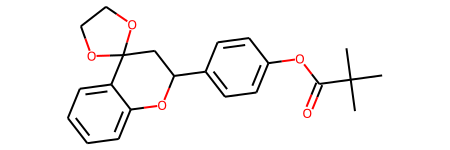

In [8]:
Chem.MolFromSmiles("CC(C)(C)C(=O)Oc1ccc(C2CC3(OCCO3)c3ccccc3O2)cc1")

In [9]:
missing_lig = []
mols_lig = []
for smi in canon_lig:
    if smi not in list(dft_lig["rdkit_can"]):
        #print(smi)
        missing_lig.append(smi)
        mols_lig.append(Chem.MolFromSmiles(smi))
missing_lig

['C1CCC(P(C2CCCCC2)C2CCCCC2)CC1.[CH]1[CH][CH][C](P(c2ccccc2)c2ccccc2)[CH]1.[CH]1[CH][CH][C](P(c2ccccc2)c2ccccc2)[CH]1.[Fe]',
 'CC(C)(C)P(C(C)(C)C)C(C)(C)C',
 'CC(C)(C)P(C1CCCC1)C(C)(C)C.CC(C)(C)P(C1CCCC1)C(C)(C)C.[Fe]',
 'CC(C)N1c2ccccc2N(C(C)C)C1[C]C1N(C)c2ccccc2N1C',
 'CC(C)N1c2ccccc2N(C)C1[C]C1N(C)c2ccccc2N1C(C)C',
 'CC(C)P([C]1[CH][CH][CH][CH]1)C(C)C.CC(C)P([C]1[CH][CH][CH][CH]1)C(C)C.[Fe]',
 'CCCP(CCC)C1CCCC1.CCCP(CCC)C1CCCC1.[Fe]',
 'Cc1ccc(P(c2ccc(C)cc2)c2ccc(C)cc2)cc1',
 'Cc1ccccc1P(c1ccccc1C)c1ccccc1C',
 '[CH]1[CH][CH][C](P(C2CCCCC2)C2CCCCC2)[CH]1.[CH]1[CH][CH][C](P(C2CCCCC2)C2CCCCC2)[CH]1.[Fe]',
 '[CH]1[CH][CH][C](P(c2ccccc2)c2ccccc2)[CH]1.[CH]1[CH][CH][C](P(c2ccccc2)c2ccccc2)[CH]1.[Fe]',
 '[C]1N(C23CC4CC(CC(C4)C2)C3)C=CN1C12CC3CC(CC(C3)C1)C2',
 'c1ccc(P(CCCCP(c2ccccc2)c2ccccc2)c2ccccc2)cc1',
 'c1ccc(P(c2ccccc2)c2ccccc2)cc1']

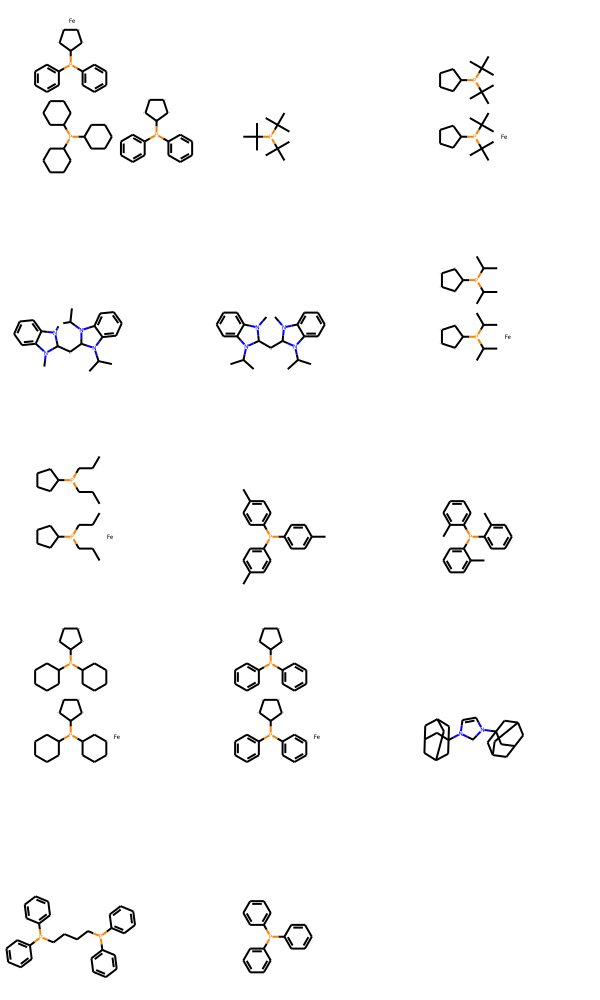

In [10]:
Chem.Draw.MolsToGridImage(mols_lig)

In [11]:
missing = len(canon_lig) - len(dft_lig)
print(len(missing_lig))

14


In [12]:
missing_ax = []
mols_ax = []
for smi in canon_ax:
    if smi not in list(dft_ax["rdkit_can"]):
        print(smi)
        missing_ax.append(smi)
        mols_ax.append(Chem.MolFromSmiles(smi))

CCCCc1ccc(B2OB(c3ccc(CCCC)cc3)OB(c3ccc(CCCC)cc3)O2)cc1
Cc1cc(C)c([Mg]Br)c(C)c1
Cc1ccc([Mg]I)cc1
[Li][Zn]([Li])(C)(C)(C)c1ccc(C(=O)N(C(C)C)C(C)C)cc1
[Na+].c1ccc([B-](c2ccccc2)(c2ccccc2)c2ccccc2)cc1


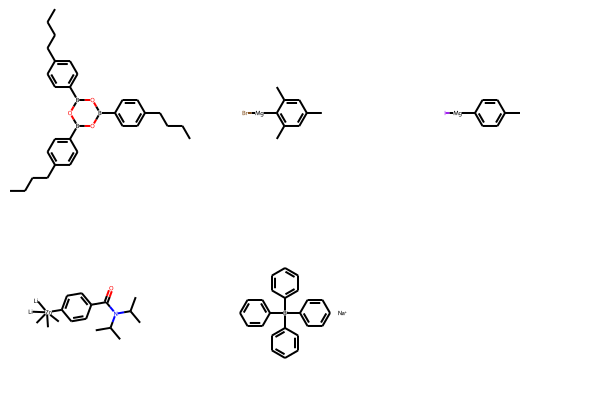

In [13]:
Chem.Draw.MolsToGridImage(mols_ax)

In [14]:
missing_ax

['CCCCc1ccc(B2OB(c3ccc(CCCC)cc3)OB(c3ccc(CCCC)cc3)O2)cc1',
 'Cc1cc(C)c([Mg]Br)c(C)c1',
 'Cc1ccc([Mg]I)cc1',
 '[Li][Zn]([Li])(C)(C)(C)c1ccc(C(=O)N(C(C)C)C(C)C)cc1',
 '[Na+].c1ccc([B-](c2ccccc2)(c2ccccc2)c2ccccc2)cc1']

In [23]:
missing = len(canon_ax) - len(dft_ax)
print(len(missing_ax))

5


In [24]:
missing_ax

['CCCCc1ccc(B2OB(c3ccc(CCCC)cc3)OB(c3ccc(CCCC)cc3)O2)cc1',
 'Cc1cc(C)c([Mg]Br)c(C)c1',
 'Cc1ccc([Mg]I)cc1',
 '[Li][Zn]([Li])(C)(C)(C)c1ccc(C(=O)N(C(C)C)C(C)C)cc1',
 '[Na+].c1ccc([B-](c2ccccc2)(c2ccccc2)c2ccccc2)cc1']

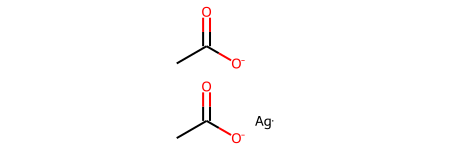

In [135]:
Chem.MolFromSmiles("CC(=O)[O-].CC(=O)[O-].[Ag]")